<h1>Data Analytics Activity</h1>
<h1>Dengue Cases Data Analytics</h1>
<p>Analyst: Cristina Gail Rodelas</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

In [2]:
dengue = pd.read_csv("datasets\\dengue.csv")

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1>Data Preparation</h1>

In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [6]:
dengue.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1020.0,2018.000000,1.414907,2016.0,2017.00,2018.0,2019.00,2020.0
Dengue_Cases,1020.0,1124.926471,1662.608878,10.0,247.75,582.5,1284.25,21658.0
Dengue_Deaths,1020.0,16.513725,96.358215,0.0,1.00,3.0,7.00,1651.0


In [7]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>Data Cleansing</h1>
<p>Filling out null values</p>

In [8]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1>Categorical Data Fields</h1>

In [9]:
dengue['Region'] = dengue['Region'].astype('category')
dengue['Month'] = dengue['Month'].astype('category')

In [10]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1>Data Analytics</h1
<h3>Analyzing Each from the Dataset</h3>

<h1>Univariate Insights (7 Insights)
</h1>

<h3>Question No.1: The average number of dengue cases per month across all regions.
<h31>

In [11]:
ave_deng = dengue.groupby('Month')['Dengue_Cases'].mean()
ave_deng

Month
April         382.447059
August       2206.517647
December     1040.364706
February      915.305882
January       992.094118
July         1626.376471
June          683.647059
March         677.364706
May           381.023529
November     1116.470588
October      1384.058824
September    2093.447059
Name: Dengue_Cases, dtype: float64

<h4>The data above represents the average number of dengue cases per month across all regions. It shows that August has the highest average number of dengue cases at 2206.52, whereas May has the lowest average at 381.02.</h4>

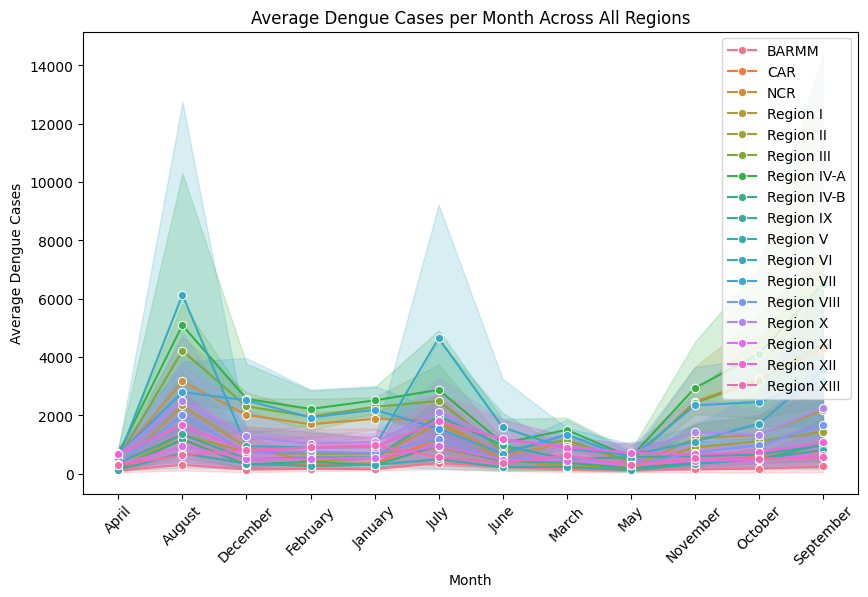

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dengue, x='Month', y='Dengue_Cases', hue='Region', marker='o')
plt.title('Average Dengue Cases per Month Across All Regions')
plt.xlabel('Month')
plt.ylabel('Average Dengue Cases')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

<h3>Question No.2: Highest number of dengue cases recorded in a single month</h3>

In [13]:
max_cases = dengue['Dengue_Cases'].max()
max_month = dengue.loc[dengue['Dengue_Cases'].idxmax(), 'Month']
print(f'Highest number of dengue cases: {max_cases} in {max_month}')

Highest number of dengue cases: 21658 in September


<h4>The data reveals that the highest number of dengue cases recorded in a single month is 21,658, occurring in September.</h4>

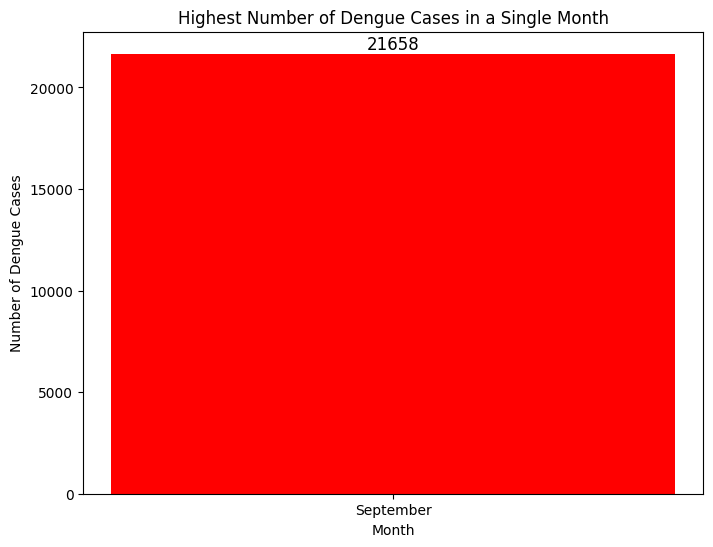

In [14]:
plt.figure(figsize=(8, 6))
plt.bar(max_month, max_cases, color='red')
plt.title('Highest Number of Dengue Cases in a Single Month')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.text(max_month, max_cases, f'{max_cases}', ha='center', va='bottom', fontsize=12, color='black') 
plt.show()

<h3>Question No.3: The standard deviation of dengue deaths across all regions.
<h31>

In [15]:
std_deaths = dengue['Dengue_Deaths'].std()
print(f'Standard deviation of dengue deaths across all regions: {std_deaths:.2f}')

Standard deviation of dengue deaths across all regions: 96.36


<h4>The data indicates that the standard deviation of dengue deaths across all regions is approximately 96.36, signifying variability in the number of deaths between regions.</h4>

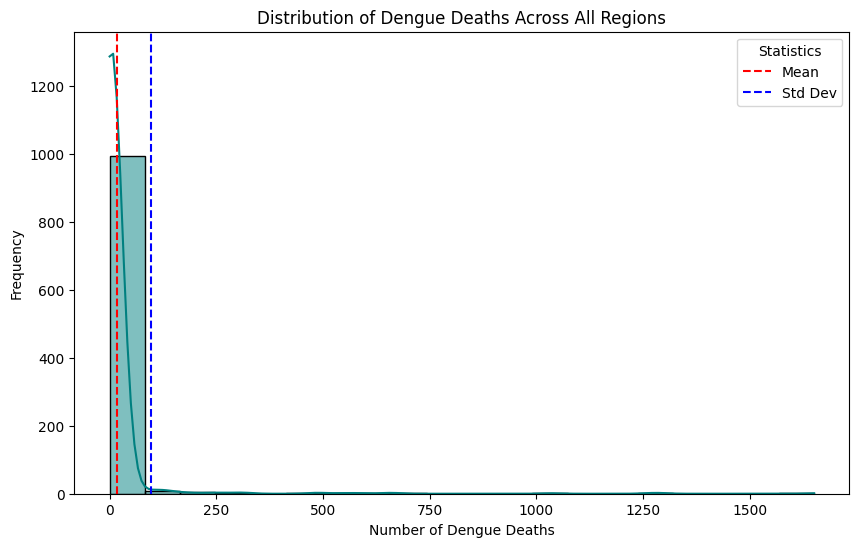

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(dengue['Dengue_Deaths'], bins=20, kde=True, color='teal')
plt.axvline(dengue['Dengue_Deaths'].mean(), color='red', linestyle='dashed', label='Mean')
plt.axvline(dengue['Dengue_Deaths'].std(), color='blue', linestyle='dashed', label='Std Dev')
plt.title('Distribution of Dengue Deaths Across All Regions')
plt.xlabel('Number of Dengue Deaths')
plt.ylabel('Frequency')
plt.legend(title='Statistics', loc='upper right')
plt.show()

<h3>Question No.4: The month with the fewest dengue cases, consistently across years.
</h3>

In [17]:
fewest_cases_month = dengue.groupby(dengue['Month'])['Dengue_Cases'].mean().idxmin()
print(f"Month with the fewest dengue cases: {fewest_cases_month}")

Month with the fewest dengue cases: May


<h4>The month with the fewest dengue cases, consistently across years is the month of May.</h4>

<h3>Question No.5: The proportion of months that exceed the mean number of cases.
<h31>

In [18]:
mean_cases = dengue['Dengue_Cases'].mean()
months_above_mean = len(dengue[dengue['Dengue_Cases'] > mean_cases]) / len(dengue) * 100
print(f'Percentage of months exceeding the mean number of cases: {months_above_mean:.2f}%')

Percentage of months exceeding the mean number of cases: 28.92%


<h4>The proportion of months that exceed the mean number of cases is 28.92%.</h4>

<h3>Question No.6: The distribution shape (e.g., skewed or normal) for dengue cases per month.</h3>

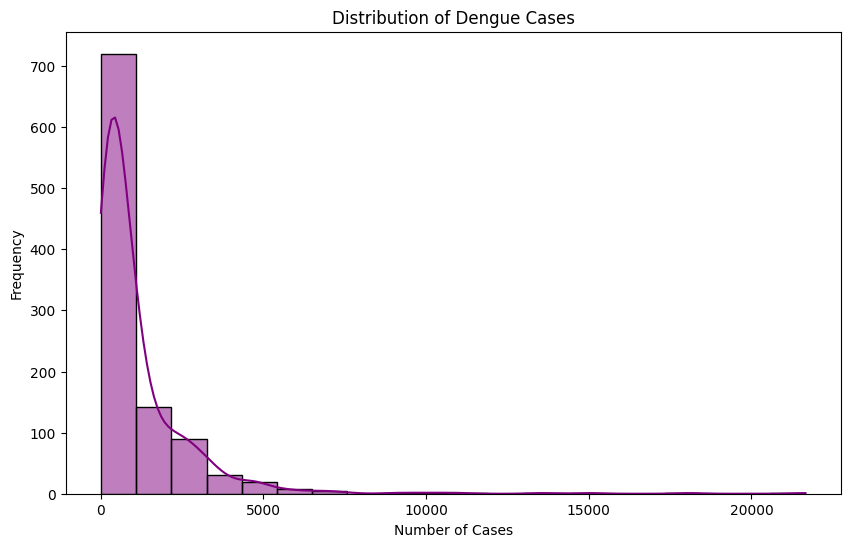

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(dengue['Dengue_Cases'], bins=20, kde=True, color='purple')
plt.title('Distribution of Dengue Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.show()

<h4>Most months have low dengue cases, but a few months experience significant spikes, showing that outbreaks are unevenly distributed.</h4>

<h3>Question No.7: The median monthly dengue deaths for all regions.</h3>

In [20]:
median_deaths = dengue.groupby('Month')['Dengue_Deaths'].median()
median_deaths

Month
April        1.0
August       4.0
December     2.0
February     3.0
January      3.0
July         5.0
June         2.0
March        2.0
May          1.0
November     3.0
October      6.0
September    9.0
Name: Dengue_Deaths, dtype: float64

<h4>The data shows that September has the highest median dengue deaths with 9, while in April and May have the lowest medians, with just 1 dengue death each.</h4>

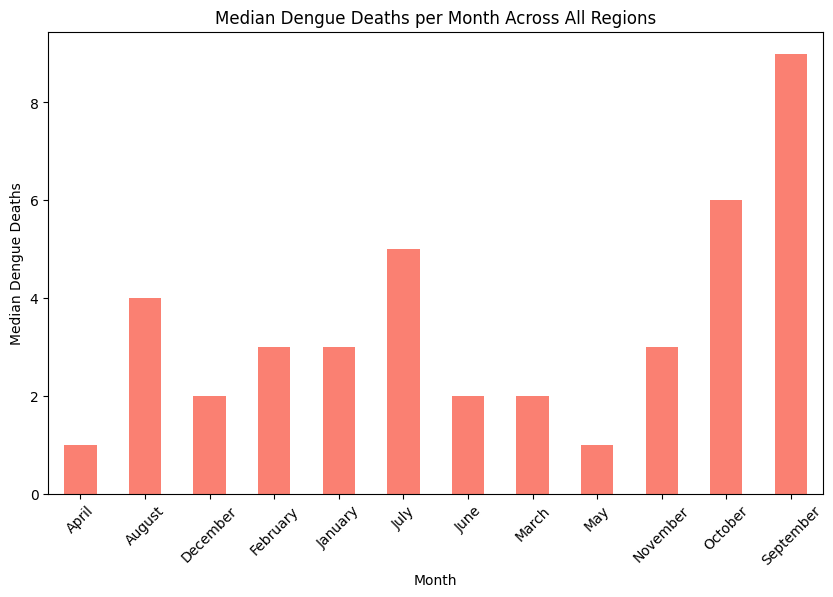

In [21]:
plt.figure(figsize=(10, 6))
median_deaths.plot(kind='bar', color='salmon')
plt.title('Median Dengue Deaths per Month Across All Regions')
plt.xlabel('Month')
plt.ylabel('Median Dengue Deaths')
plt.xticks(rotation=45)
plt.show()

<h1>Bivariate Insights (7 Insights)</h1>

<h3>Question No.8: The correlation between dengue cases and deaths for each region.</h3>

In [22]:
correlation_by_region = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].corr().iloc[0::2, 1].reset_index()
correlation_by_region.columns = ['Region', '_', 'Correlation']
print("Correlation between Dengue Cases and Deaths by Region:")
print(correlation_by_region)

Correlation between Dengue Cases and Deaths by Region:
         Region             _  Correlation
0         BARMM  Dengue_Cases    -0.056232
1           CAR  Dengue_Cases    -0.019237
2           NCR  Dengue_Cases    -0.060607
3      Region I  Dengue_Cases     0.784995
4     Region II  Dengue_Cases     0.775524
5    Region III  Dengue_Cases     0.727460
6   Region IV-A  Dengue_Cases     0.853611
7   Region IV-B  Dengue_Cases     0.525196
8     Region IX  Dengue_Cases     0.013137
9      Region V  Dengue_Cases     0.817475
10    Region VI  Dengue_Cases     0.002393
11   Region VII  Dengue_Cases     0.021914
12  Region VIII  Dengue_Cases    -0.017929
13     Region X  Dengue_Cases    -0.109215
14    Region XI  Dengue_Cases    -0.004509
15   Region XII  Dengue_Cases    -0.006207
16  Region XIII  Dengue_Cases    -0.089303


<h4>The data shows that Region IV-A has the highest positive correlation between dengue cases and deaths, indicating a strong relationship in this region.</h4>

<h3>Question No.9: The average number of deaths per dengue case in each region.
</h3>

In [23]:
dengue['Deaths_Per_Case'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']
avg_deaths_per_case = dengue.groupby('Region')['Deaths_Per_Case'].mean()
avg_deaths_per_case

Region
BARMM          0.065735
CAR            0.069733
NCR            0.094127
Region I       0.003880
Region II      0.004312
Region III     0.003285
Region IV-A    0.004630
Region IV-B    0.004592
Region IX      0.050159
Region V       0.009745
Region VI      0.044048
Region VII     0.033174
Region VIII    0.044665
Region X       0.039337
Region XI      0.038167
Region XII     0.078923
Region XIII    0.093691
Name: Deaths_Per_Case, dtype: float64

<h4>The data shows that NCR has the highest average deaths per dengue case at 0.094, closely followed by Region XIII at 0.093.</h4>

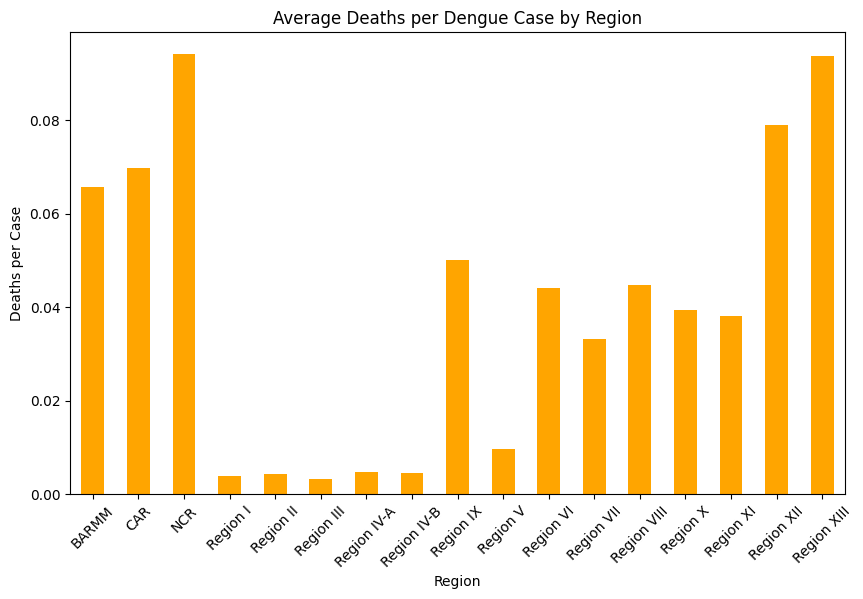

In [24]:
plt.figure(figsize=(10, 6))
avg_deaths_per_case.plot(kind='bar', color='orange')
plt.title('Average Deaths per Dengue Case by Region')
plt.xlabel('Region')
plt.ylabel('Deaths per Case')
plt.xticks(rotation=45)
plt.show()

<h3>Question No.10: The trend of dengue cases over time (e.g., increasing or decreasing).
</h3>

In [25]:
cases_trend = dengue.groupby('Year')['Dengue_Cases'].sum()
cases_trend

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64

<h4>Dengue cases showed an increasing trend from 2016 to 2019, with the highest number of cases recorded in 2019 (441,902).</h4>

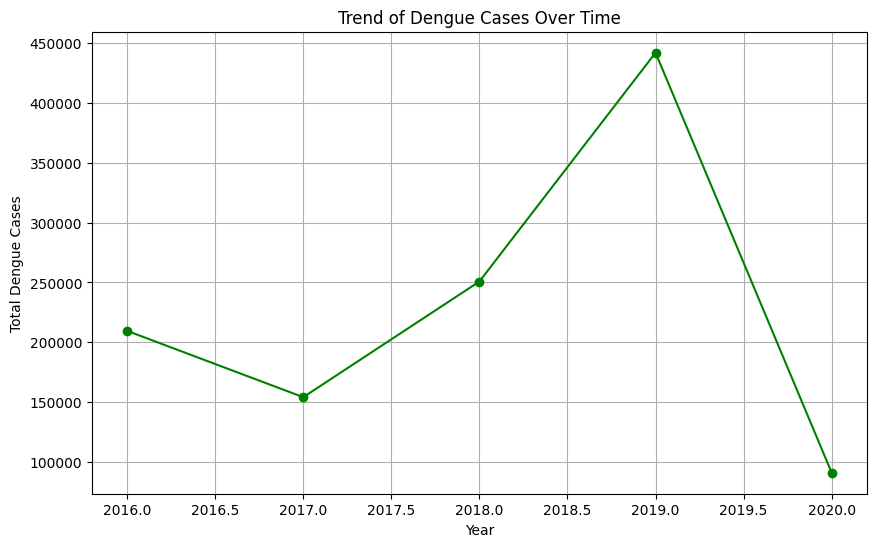

In [26]:
plt.figure(figsize=(10, 6))
cases_trend.plot(color='green', marker='o')
plt.title('Trend of Dengue Cases Over Time')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.grid(True)
plt.show()

<h3>Question No.11: Identify whether some regions consistently report a higher death-to-case ratio compared to others.</h3>

In [27]:
dengue['Death_to_Case_Ratio'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']
region_ratios = dengue.groupby('Region')['Death_to_Case_Ratio'].mean().sort_values(ascending=False)
region_ratios

Region
NCR            0.094127
Region XIII    0.093691
Region XII     0.078923
CAR            0.069733
BARMM          0.065735
Region IX      0.050159
Region VIII    0.044665
Region VI      0.044048
Region X       0.039337
Region XI      0.038167
Region VII     0.033174
Region V       0.009745
Region IV-A    0.004630
Region IV-B    0.004592
Region II      0.004312
Region I       0.003880
Region III     0.003285
Name: Death_to_Case_Ratio, dtype: float64

<h4>The data shows that NCR (National Capital Region) consistently reports the highest death-to-case ratio, with an average of 0.0941.</h4>

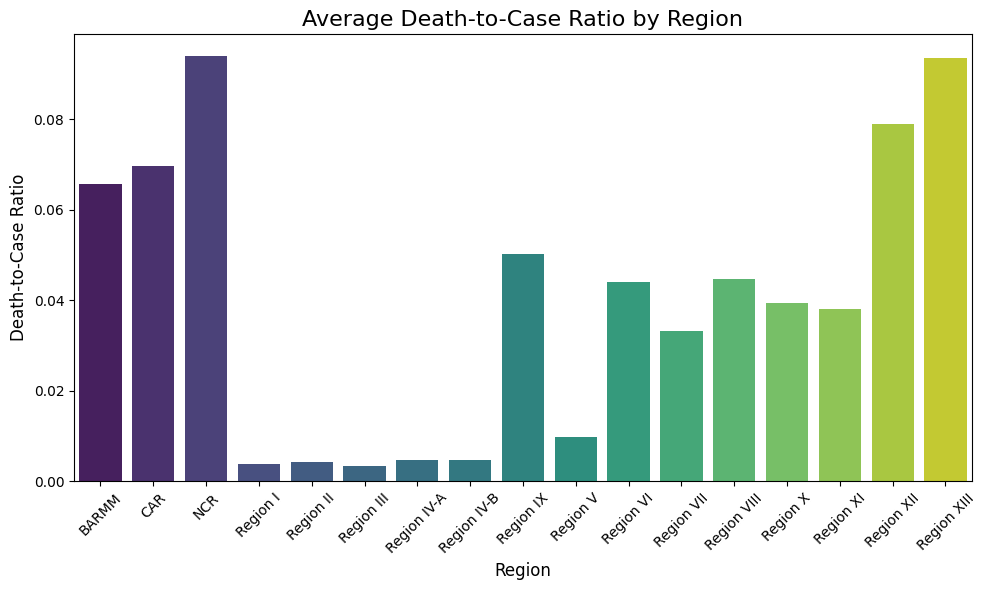

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=region_ratios.index, y=region_ratios.values, palette="viridis")
plt.title("Average Death-to-Case Ratio by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Death-to-Case Ratio", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Question No.12: The regions with the highest average deaths compared to reported cases.
</h3>

In [29]:
avg_deaths_vs_cases = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].mean()
avg_deaths_vs_cases['Deaths_to_Cases_Ratio'] = avg_deaths_vs_cases['Dengue_Deaths'] / avg_deaths_vs_cases['Dengue_Cases']
highest_death_ratio_regions = avg_deaths_vs_cases.sort_values(by='Deaths_to_Cases_Ratio', ascending=False).head()
print("Regions with the Highest Average Death-to-Case Ratio:\n")
print(highest_death_ratio_regions)

Regions with the Highest Average Death-to-Case Ratio:

             Dengue_Cases  Dengue_Deaths  Deaths_to_Cases_Ratio
Region                                                         
Region XII     996.700000      46.600000               0.046754
NCR           1932.766667      66.800000               0.034562
CAR            509.700000      16.800000               0.032961
BARMM          192.283333       5.533333               0.028777
Region XIII    588.216667      16.100000               0.027371


<h4>It shows that Region XII has the highest death-to-case ratio, with an average of 0.047 deaths per case.</h4>

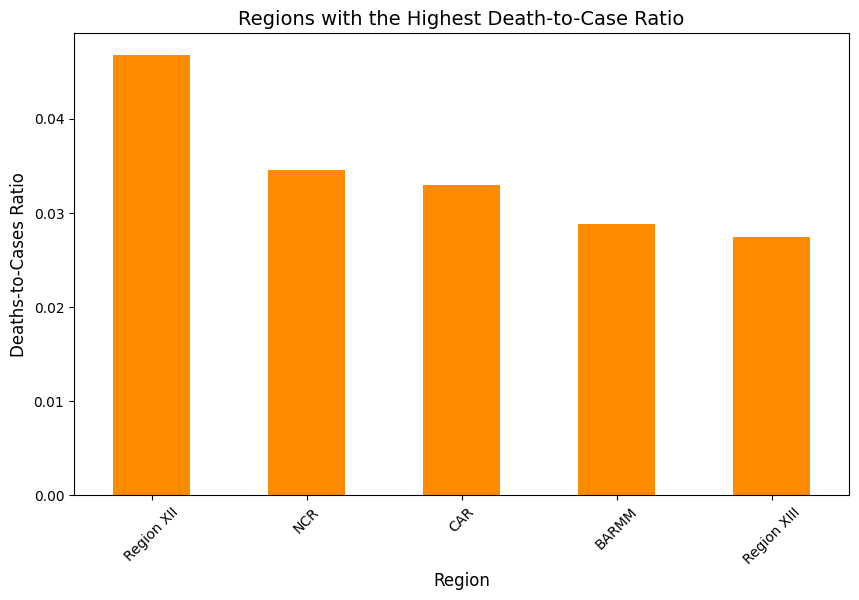

In [30]:
plt.figure(figsize=(10, 6))
highest_death_ratio_regions['Deaths_to_Cases_Ratio'].plot(kind='bar', color='darkorange')

plt.title('Regions with the Highest Death-to-Case Ratio', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Deaths-to-Cases Ratio', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<h3>Question No.13: Investigate which regions and months contribute most significantly to high dengue deaths in severe years.
</h3>

In [31]:
dengue['Death_to_Case_Ratio'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']
region_ratios = dengue.groupby('Region')['Death_to_Case_Ratio'].mean().sort_values(ascending=False)
region_ratios

Region
NCR            0.094127
Region XIII    0.093691
Region XII     0.078923
CAR            0.069733
BARMM          0.065735
Region IX      0.050159
Region VIII    0.044665
Region VI      0.044048
Region X       0.039337
Region XI      0.038167
Region VII     0.033174
Region V       0.009745
Region IV-A    0.004630
Region IV-B    0.004592
Region II      0.004312
Region I       0.003880
Region III     0.003285
Name: Death_to_Case_Ratio, dtype: float64

<h4>It shows that NCR (National Capital Region) has the highest death-to-case ratio of 0.0941, highlighting its significant contribution to high dengue deaths during severe years.</h4>

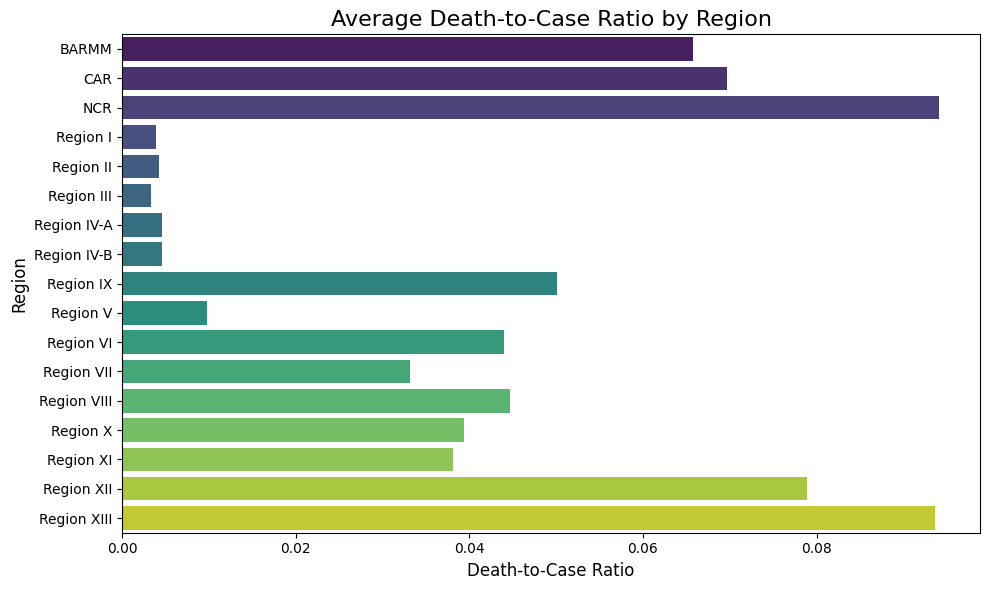

In [32]:
region_ratios_df = region_ratios.reset_index()
region_ratios_df.columns = ['Region', 'Death_to_Case_Ratio']

plt.figure(figsize=(10, 6))
sns.barplot(x='Death_to_Case_Ratio', y='Region', data=region_ratios_df, palette="viridis")
plt.title("Average Death-to-Case Ratio by Region", fontsize=16)
plt.xlabel("Death-to-Case Ratio", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.tight_layout()
plt.show()

<h3>Question No.14: The monthly distribution of cases across two representative years.
</h3>

In [33]:
year1_data = dengue[dengue['Year'] == 2019]  
year2_data = dengue[dengue['Year'] == 2020]  

monthly_cases_year1 = year1_data.groupby('Month')['Dengue_Cases'].sum()
monthly_cases_year2 = year2_data.groupby('Month')['Dengue_Cases'].sum()

print("Monthly Dengue Cases in 2019:")
print(monthly_cases_year1)

print("\nMonthly Dengue Cases in 2020:")
print(monthly_cases_year2)

Monthly Dengue Cases in 2019:
Month
April         9252
August       85038
December     24397
February     25494
January      20672
July         55220
June         25523
March        19798
May          10387
November     30097
October      46382
September    89642
Name: Dengue_Cases, dtype: int64

Monthly Dengue Cases in 2020:
Month
April         2784
August        7072
December      5956
February     19583
January      18324
July          4575
June          2665
March        12838
May           2461
November      5807
October       4035
September     4941
Name: Dengue_Cases, dtype: int64


<h4>In 2019, dengue cases peaked in August with 85,038 cases and in September with 89,642 cases, showing very high numbers, while in 2020, cases significantly declined, with the highest numbers recorded in January at 18,324 cases and February at 19,583 cases.</h4>

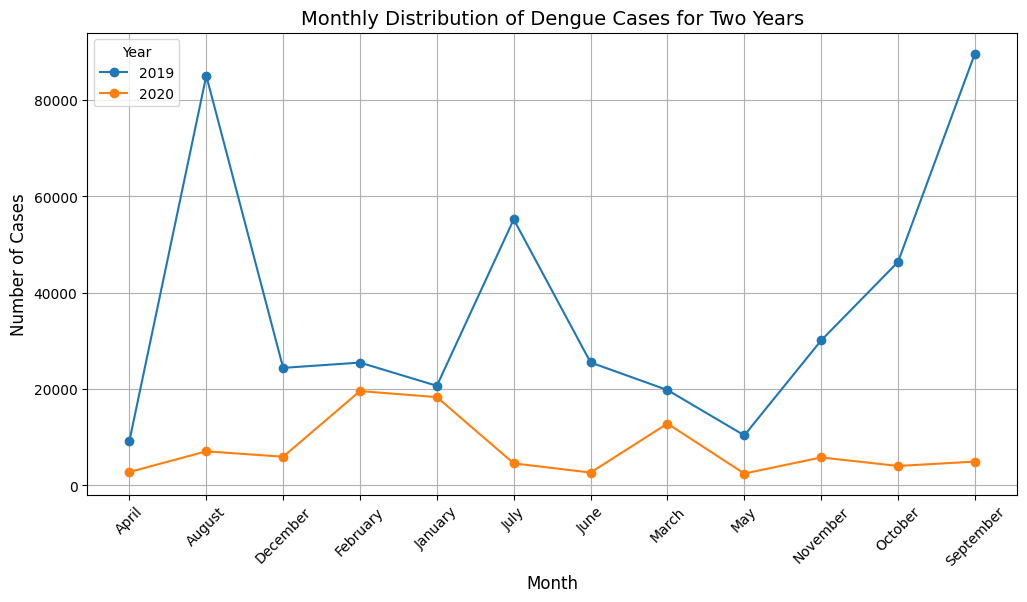

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_cases_year1.index, monthly_cases_year1.values, marker='o', label='2019')
plt.plot(monthly_cases_year2.index, monthly_cases_year2.values, marker='o', label='2020')

plt.title('Monthly Distribution of Dengue Cases for Two Years', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(title='Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<h1>Multivariate Insights (6 Insights)
</h1>

<h3>Question No.15: The regions, months, and years with the highest dengue case rates.
</h3>

In [35]:
highest_case_rates = dengue.groupby(['Region', 'Year', 'Month'])['Dengue_Cases'].sum().reset_index()
highest_case_rates_sorted = highest_case_rates.sort_values(by='Dengue_Cases', ascending=False)
highest_case_rates_sorted

,Region,Year,Month,Dengue_Cases
407,Region IV-A,2019,September,21658
637,Region VI,2019,August,18090
397,Region IV-A,2019,August,15047
641,Region VI,2019,July,13564
167,NCR,2019,September,11033
...,...,...,...,...
59,BARMM,2020,September,16
57,BARMM,2020,November,15
58,BARMM,2020,October,13
1017,Region XIII,2020,November,12


<h4>The data shows that 2019 had regions with very high dengue cases, while 2020 had extremely low numbers across some regions and months.</h4>

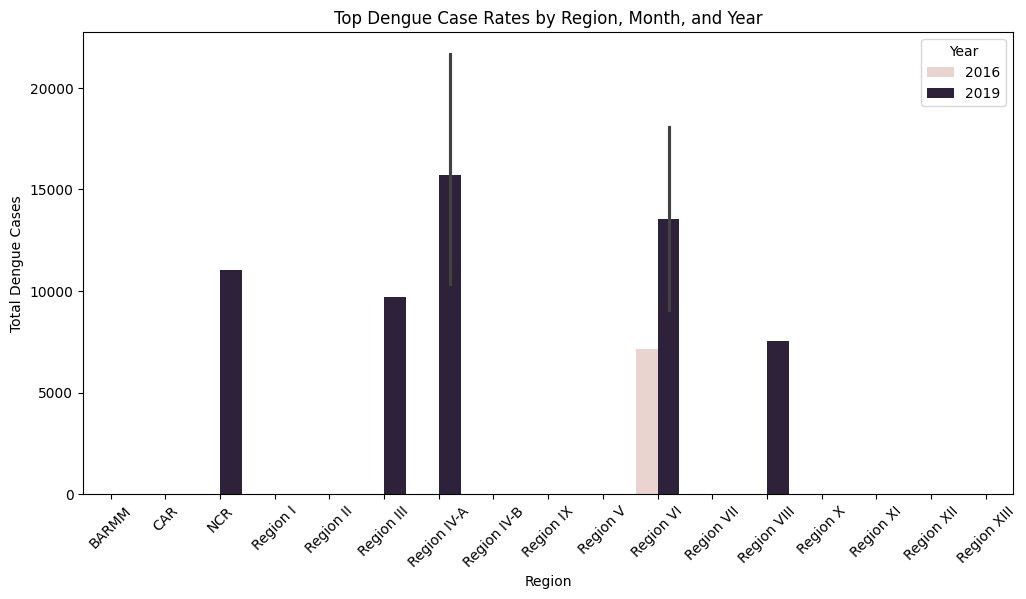

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=highest_case_rates_sorted.head(10), x='Region', y='Dengue_Cases', hue='Year')
plt.title('Top Dengue Case Rates by Region, Month, and Year')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

<h3>Question No.16: Which regions experienced the sharpest monthly case spikes when analyzing year, month, and deaths simultaneously?
</h3>

In [37]:
dengue = dengue.sort_values(by=['Region', 'Year', 'Month'])

dengue['Case_Change'] = dengue.groupby('Region')['Dengue_Cases'].diff()
dengue['Death_Change'] = dengue.groupby('Region')['Dengue_Deaths'].diff()
max_spike = dengue.loc[dengue['Case_Change'].idxmax()]

print("Region with the sharpest spike:", max_spike['Region'])
print("Year:", max_spike['Year'], "Month:", max_spike['Month'])
print("Case Increase:", max_spike['Case_Change'])
print("Associated Deaths Increase:", max_spike['Death_Change'])

spike_data = dengue[dengue['Case_Change'] > 0]

Region with the sharpest spike: Region VI
Year: 2019 Month: August
Case Increase: 16891.0
Associated Deaths Increase: 47.0


<h4>The data shows a sharp rise of 16,891 dengue cases in August 2019, marking a sudden outbreak in Region VI.</h4>

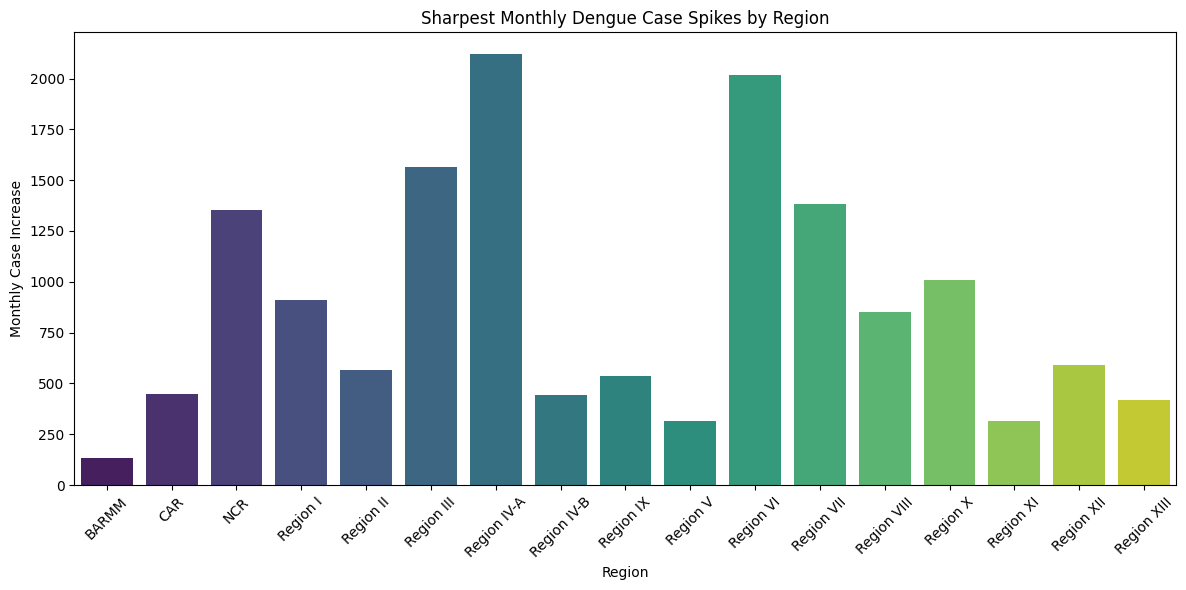

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Case_Change', data=spike_data, ci=None, palette='viridis')
plt.title("Sharpest Monthly Dengue Case Spikes by Region")
plt.xlabel("Region")
plt.ylabel("Monthly Case Increase")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Question No.17: What clusters of years show similar patterns of dengue case surges across regions?</h3>

In [39]:
aggregated_data = dengue.groupby(['Year', 'Region'])['Dengue_Cases'].sum().reset_index()
aggregated_data

,Year,Region,Dengue_Cases
0,2016,BARMM,2191
1,2016,CAR,9164
2,2016,NCR,13002
3,2016,Region I,8281
4,2016,Region II,3891
...,...,...,...
80,2020,Region VIII,4832
81,2020,Region X,6225
82,2020,Region XI,1936
83,2020,Region XII,4363


<h4>Regions such as NCR, CAR, and Region I often contribute the most significant case numbers, highlighting them as potential drivers of overall trends in specific clusters.</h4>

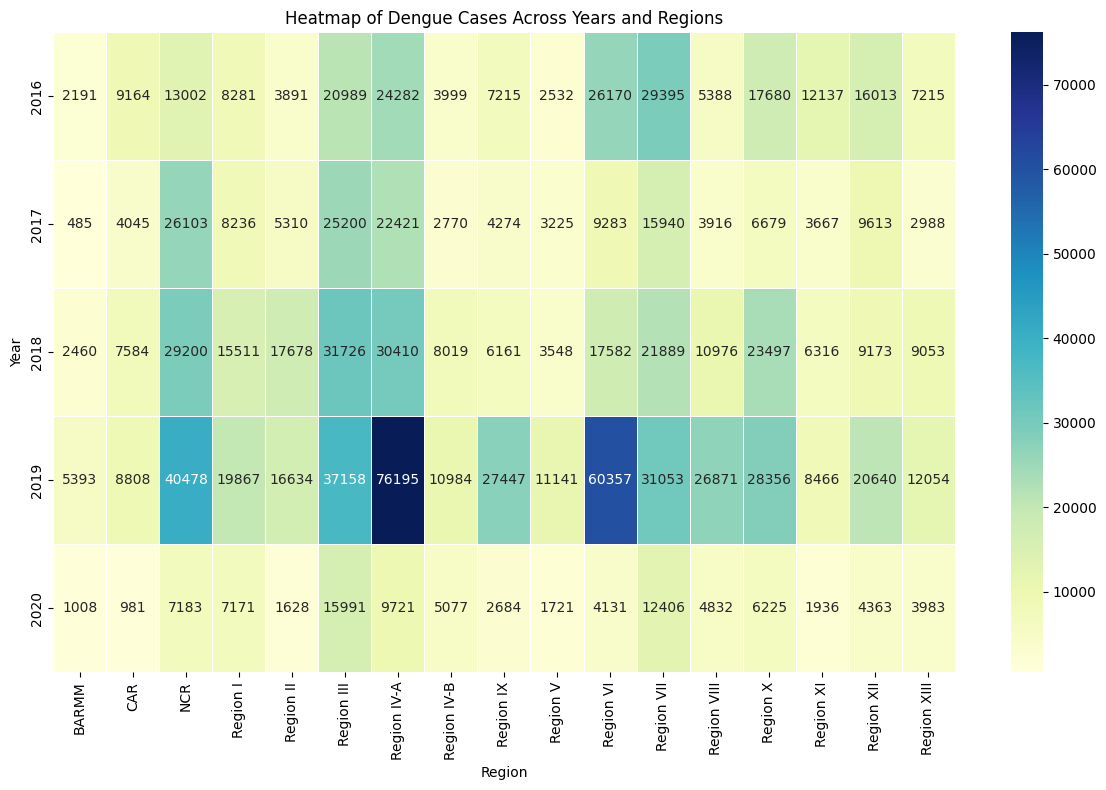

In [40]:
heatmap_data = aggregated_data.pivot(index='Year', columns='Region', values='Dengue_Cases').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)
plt.title("Heatmap of Dengue Cases Across Years and Regions")
plt.xlabel("Region")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

<h3>Question No.18: Patterns of deaths when looking at region, month, and severity of outbreaks.
</h3>

In [41]:
dengue['Severity'] = pd.cut(dengue['Dengue_Cases'], bins=[0, 50, 200, float('inf')], labels=['Low', 'Medium', 'High'])
death_patterns = dengue.groupby(['Region', 'Month', 'Severity'])['Dengue_Deaths'].sum().reset_index()
death_patterns

,Region,Month,Severity,Dengue_Deaths
0,BARMM,April,Low,0
1,BARMM,April,Medium,7
2,BARMM,April,High,2
3,BARMM,August,Low,0
4,BARMM,August,Medium,0
...,...,...,...,...
607,Region XIII,October,Medium,0
608,Region XIII,October,High,489
609,Region XIII,September,Low,31
610,Region XIII,September,Medium,0


<h4>It shows that deaths are highest in Region XIII during outbreaks of high severity, with 489 deaths in October and 317 deaths in September, while medium and low severity outbreaks generally have fewer deaths, such as 31 deaths in September for low severity in the same region.</h4>

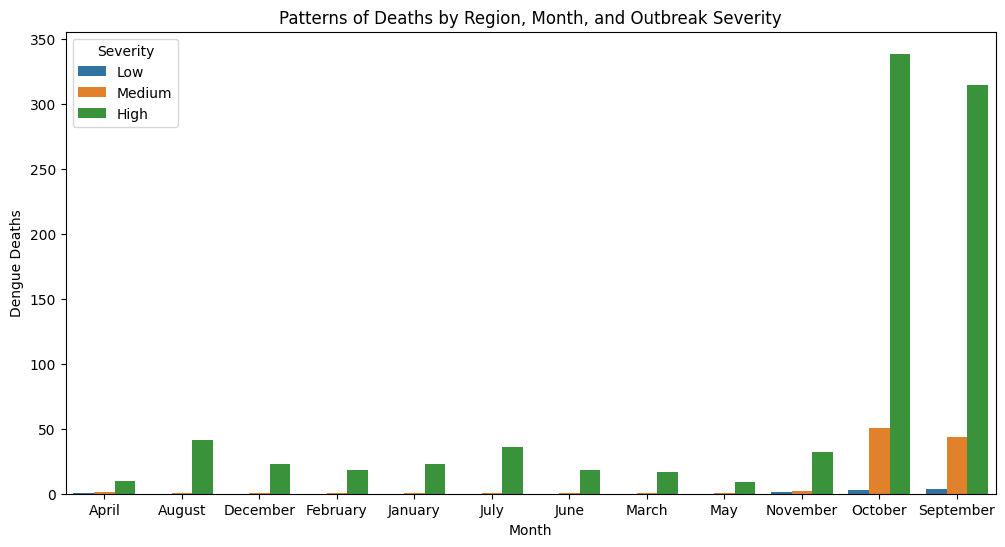

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=death_patterns, x='Month', y='Dengue_Deaths', hue='Severity', ci=None)
plt.title('Patterns of Deaths by Region, Month, and Outbreak Severity')
plt.xlabel('Month')
plt.ylabel('Dengue Deaths')
plt.legend(title='Severity')
plt.show()

<h3>Question No.19: What is the percentage contribution of each region to the average number of dengue cases across all months?
</h3>

In [43]:
region_avg_cases = dengue.groupby('Region')['Dengue_Cases'].mean().reset_index()
region_avg_cases

,Region,Dengue_Cases
0,BARMM,192.283333
1,CAR,509.700000
2,NCR,1932.766667
3,Region I,984.433333
4,Region II,752.350000
5,Region III,2184.400000
6,Region IV-A,2717.150000
7,Region IV-B,514.150000
8,Region IX,796.350000
9,Region V,369.450000


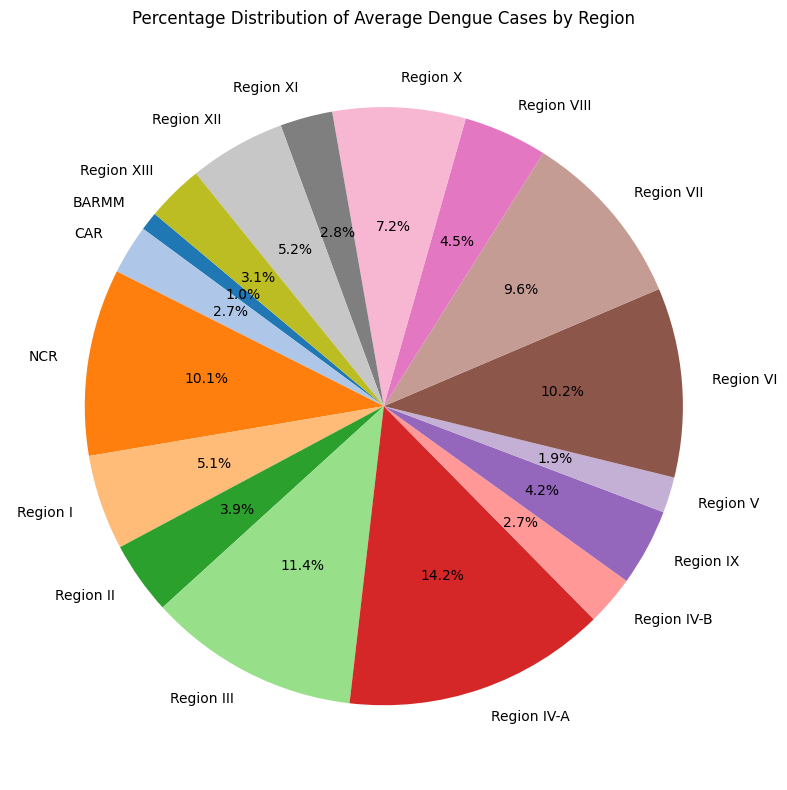

In [44]:
plt.figure(figsize=(10, 8))
plt.pie(region_avg_cases['Dengue_Cases'], labels=region_avg_cases['Region'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Percentage Distribution of Average Dengue Cases by Region")
plt.tight_layout()
plt.show()

<h3>Question No.20: Clustering regions by their monthly dengue cases across several years.</h3>

In [45]:
clustering_data = dengue.groupby(['Region', 'Month'])['Dengue_Cases'].mean().reset_index()
pivot_data = clustering_data.pivot(index='Region', columns='Month', values='Dengue_Cases').fillna(0)
pivot_data

Month,April,August,December,February,January,July,June,March,May,November,October,September
Region,,,,,,,,,,,,
BARMM,102.6,304.6,140.4,164.4,152.4,367.4,235.2,143.8,132.4,144.0,172.0,248.2
CAR,122.4,1178.6,325.4,302.4,352.8,1184.8,516.0,191.8,193.4,399.0,573.8,776.0
NCR,548.6,3161.6,2013.6,1692.8,1878.0,1826.8,627.8,1045.8,413.4,2462.4,3248.6,4273.8
Region I,193.6,2336.2,908.4,419.8,541.8,1748.0,471.4,282.6,208.0,1210.0,1326.4,2167.0
Region II,187.0,1329.0,747.2,671.8,692.6,904.2,432.0,409.4,206.8,899.8,1112.6,1435.8
Region III,516.8,4217.4,2308.8,1954.4,2289.2,2493.2,788.8,1152.0,423.8,2422.0,3192.6,4453.8
Region IV-A,694.8,5086.6,2563.4,2217.2,2509.2,2873.4,1044.0,1500.8,562.0,2934.8,4107.6,6512.0
Region IV-B,177.8,1170.4,303.8,413.6,283.0,974.6,420.6,379.4,178.8,378.6,484.0,1005.2
Region IX,372.0,1342.0,498.4,554.6,554.8,1970.6,970.6,500.2,565.0,596.6,656.0,975.4


<h4>Region IV-A consistently recorded the highest monthly dengue cases across several years, peaking in September with an average of 6,512 cases.</h4>

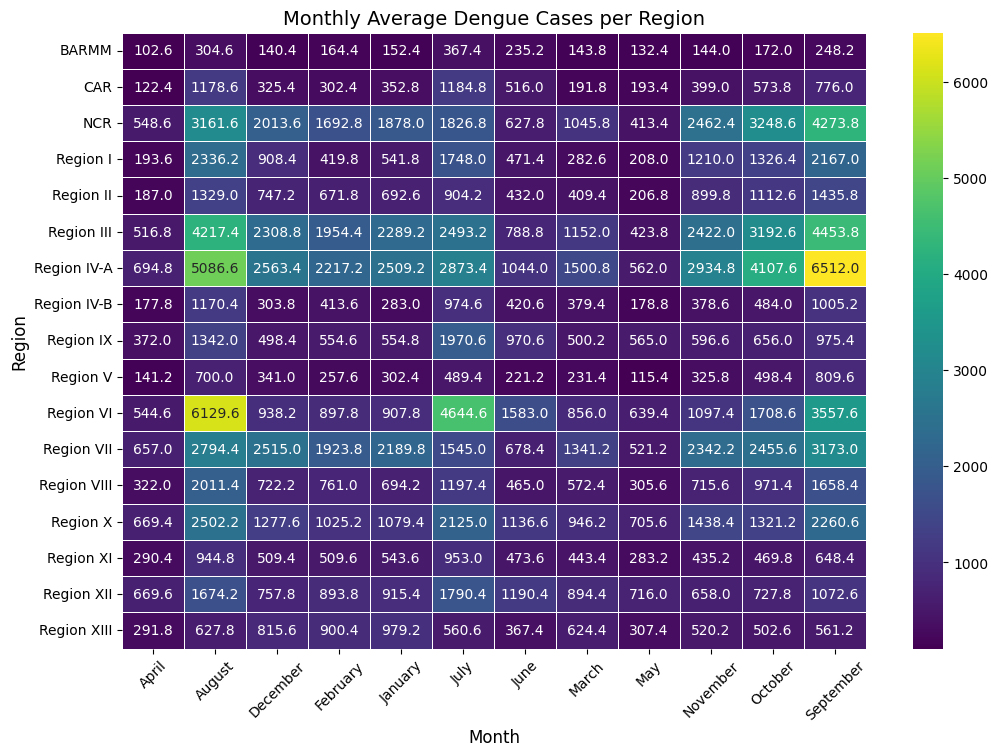

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)

plt.title('Monthly Average Dengue Cases per Region', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<h1>Question No.21: What are the top three regions with the most consistent monthly dengue cases (lowest variance)?</h1>

In [47]:
region_variance = dengue.groupby('Region')['Dengue_Cases'].var().reset_index()
region_variance = region_variance.rename(columns={'Dengue_Cases': 'Variance'})
top_regions = region_variance.sort_values(by='Variance', ascending=True).head(3)
print("Top 3 regions with the most consistent monthly dengue cases (lowest variance):")
print(top_regions)

Top 3 regions with the most consistent monthly dengue cases (lowest variance):
         Region       Variance
0         BARMM   36205.189548
14    Region XI  201092.473446
7   Region IV-B  224703.519492


<h4>BARMM experienced the most consistent monthly dengue cases with the lowest variance of 36,205.19.</h4>

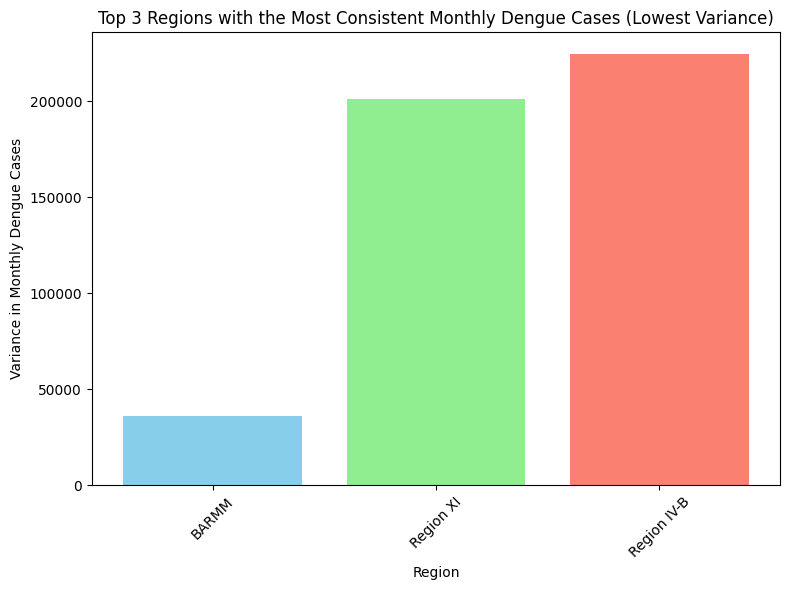

In [48]:
plt.figure(figsize=(8, 6))
plt.bar(top_regions['Region'], top_regions['Variance'], color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Top 3 Regions with the Most Consistent Monthly Dengue Cases (Lowest Variance)")
plt.xlabel("Region")
plt.ylabel("Variance in Monthly Dengue Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Question No. 22: What is the 90th percentile of monthly dengue cases for all regions?</h1>

In [49]:
percentile_90 = dengue['Dengue_Cases'].quantile(0.90)
percentile_90

2811.4

<h3>The 90th percentile of monthly dengue cases is 2,811.4, meaning 90% of cases fall below this. Months with higher cases signal outbreaks or spikes and may need further investigation.</h3>

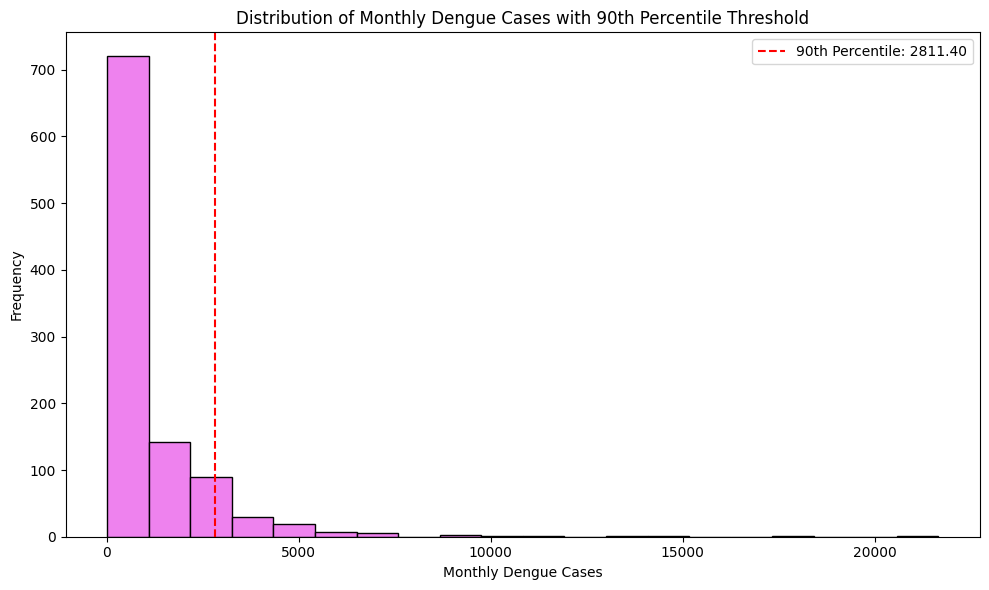

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(dengue['Dengue_Cases'], bins=20, color='violet', edgecolor='black')
plt.axvline(percentile_90, color='red', linestyle='--', label=f'90th Percentile: {percentile_90:.2f}')

plt.title("Distribution of Monthly Dengue Cases with 90th Percentile Threshold")
plt.xlabel("Monthly Dengue Cases")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

<h3>Question No.23: What is the year-on-year percentage change in cases and deaths for each region?</h3>

In [51]:
year_change = dengue.sort_values(by=['Region', 'Year'])

year_change['Cases_YoY_Change'] = year_change.groupby('Region')['Dengue_Cases'].pct_change() * 100
year_change['Deaths_YoY_Change'] = year_change.groupby('Region')['Dengue_Deaths'].pct_change() * 100

year_change

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Deaths_Per_Case,Death_to_Case_Ratio,Case_Change,Death_Change,Severity,Cases_YoY_Change,Deaths_YoY_Change
963,April,2016,BARMM,109,4,0.036697,0.036697,NaN,NaN,Medium,NaN,NaN
967,August,2016,BARMM,327,2,0.006116,0.006116,218.0,-2.0,High,200.000000,-50.000000
971,December,2016,BARMM,162,2,0.012346,0.012346,-165.0,0.0,Medium,-50.458716,0.000000
961,February,2016,BARMM,92,2,0.021739,0.021739,-70.0,0.0,Medium,-43.209877,0.000000
960,January,2016,BARMM,126,2,0.015873,0.015873,34.0,0.0,Medium,36.956522,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
830,March,2020,Region XIII,816,1,0.001225,0.001225,654.0,1.0,High,403.703704,inf
832,May,2020,Region XIII,271,0,0.000000,0.000000,-545.0,-1.0,High,-66.789216,-100.000000
838,November,2020,Region XIII,12,3,0.250000,0.250000,-259.0,3.0,Low,-95.571956,inf
837,October,2020,Region XIII,10,14,1.400000,1.400000,-2.0,11.0,Low,-16.666667,366.666667


<h4>Region XIII experienced sharp changes, with a 403.70% rise in cases and infinite changes in deaths, likely due to prior zero deaths and sudden case spikes.</h4>

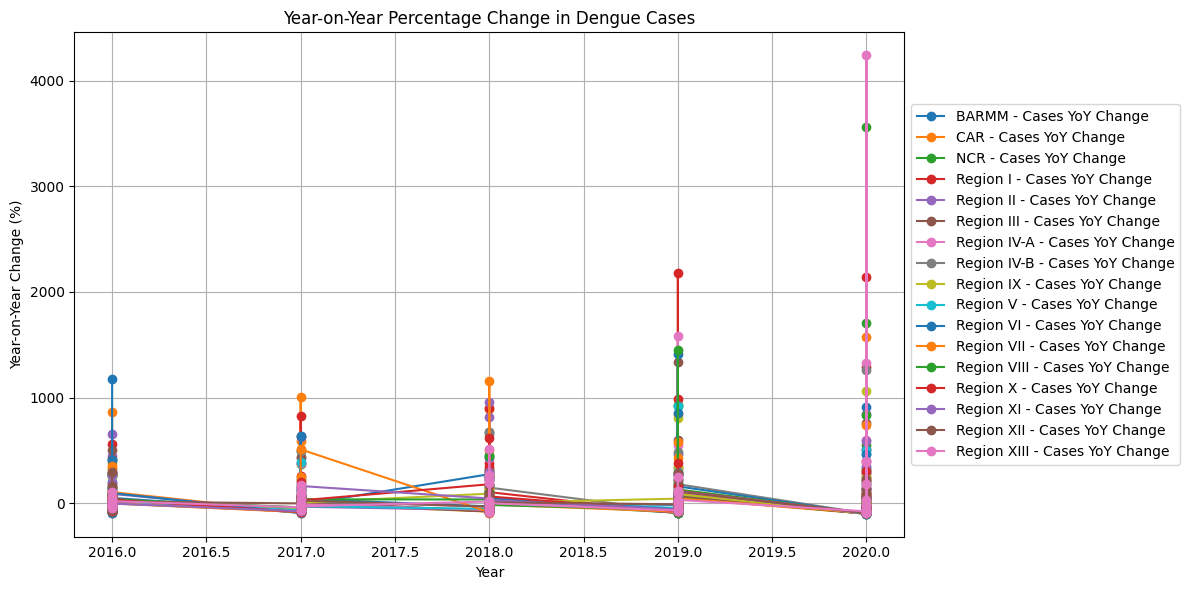

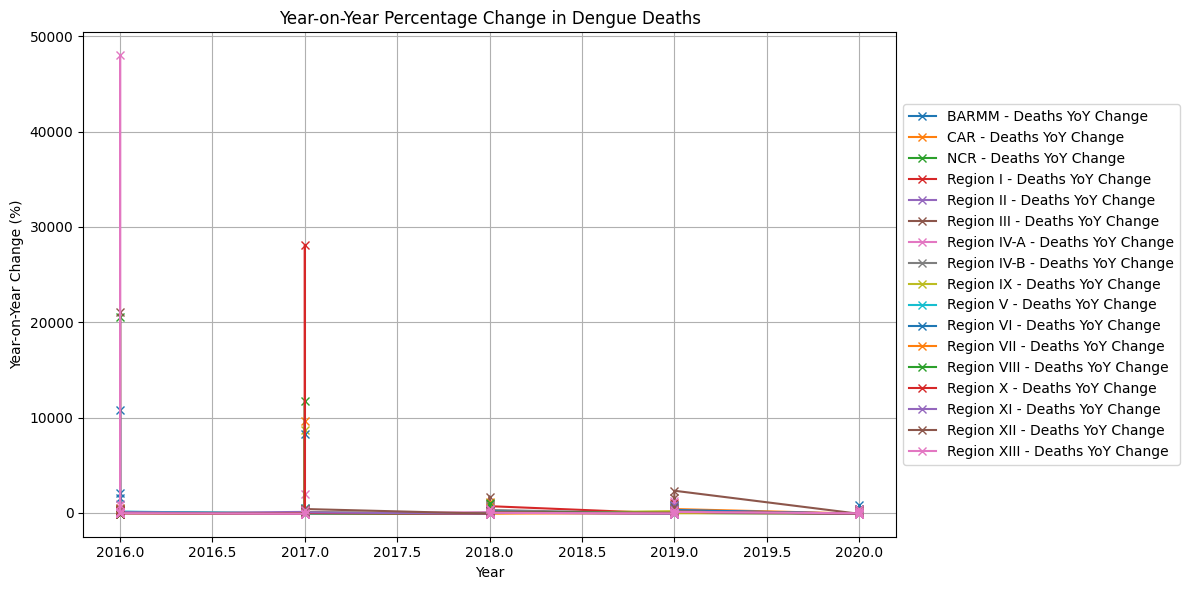

In [52]:
# For Dengue Cases 
plt.figure(figsize=(12, 6))
for region in year_change['Region'].unique():
    region_data = year_change[year_change['Region'] == region]
    plt.plot(region_data['Year'], region_data['Cases_YoY_Change'], label=f'{region} - Cases YoY Change', marker='o')

plt.xlabel('Year')
plt.ylabel('Year-on-Year Change (%)')
plt.title('Year-on-Year Percentage Change in Dengue Cases')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid(True)
plt.tight_layout()
plt.show()

# For Dengue Deaths 
plt.figure(figsize=(12, 6))
for region in year_change['Region'].unique():
    region_data = year_change[year_change['Region'] == region]
    plt.plot(region_data['Year'], region_data['Deaths_YoY_Change'], label=f'{region} - Deaths YoY Change', marker='x')

plt.xlabel('Year')
plt.ylabel('Year-on-Year Change (%)')
plt.title('Year-on-Year Percentage Change in Dengue Deaths')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid(True)
plt.tight_layout()
plt.show()
